In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#data found in the experiment for air-damped
#oscillations
freq_air = [.3,.5,.7,.9,1.1,1.3,1.5,1.55,1.6,1.65,1.9,2.1,2.3,2.5,
            2.7,3.0] #in Hz
amp_air = [10,10,12,14,16,22,38,45,62,87,63,25,13,9,6,4] #in mm
phase_air = [5,4,8,10,6,5,5,5,5,5,175,175,177,175,175,173] #in degrees

In [3]:
#data found in the experiment for water-damped
#oscillations
freq_water = [0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,
              2,2.2,2.4,2.6,2.8,3] #in Hz
amp_water = [10,11,12,14,16,22,39,47,56,62,66,65,58,48,29,16,10,6,6,5] #in mm
period_water = [3.31,1.98,1.43,1.11,0.91,0.78,0.67,0.64,0.62,0.6,0.59,
               0.57,0.55,0.54,0.5,0.45,0.41,0.38,0.36,0.33] #in s
phase_water = [23,19,24,21,18,20,27,35,45,60,75,96,125,145,170,175,185,195,
              205,220]

In [4]:
new_water = amp_water[0:]

In [5]:
#finding the amplitude needed for the equation
amp_air = np.array(amp_air)
amp_air = amp_air / 2
amp_air

array([ 5. ,  5. ,  6. ,  7. ,  8. , 11. , 19. , 22.5, 31. , 43.5, 31.5,
       12.5,  6.5,  4.5,  3. ,  2. ])

In [6]:
#finding the amplitude needed for the equation
amp_water = np.array(amp_water)
amp_water = amp_water / 2
amp_water

array([ 5. ,  5.5,  6. ,  7. ,  8. , 11. , 19.5, 23.5, 28. , 31. , 33. ,
       32.5, 29. , 24. , 14.5,  8. ,  5. ,  3. ,  3. ,  2.5])

In [7]:
#converting the other data into an array
freq_air = np.array(freq_air)
phase_air = np.array(phase_air)

In [8]:
#converting the other data into an array
freq_water = np.array(freq_water)
phase_water = np.array(phase_water)

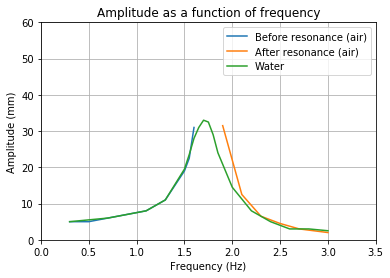

In [10]:
#the indexing found in the plots is indicating which measurements
#were collected before or after the system became too close to 
#resonance, as it was not possible to measure the necessary 
#data at those points
plt.plot(freq_air[0:9],amp_air[0:9], label = "Before resonance (air)")
plt.plot(freq_air[10:],amp_air[10:], label = "After resonance (air)")
plt.plot(freq_water,amp_water, label = "Water")
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (mm)")
plt.title("Amplitude as a function of frequency")
#ensuring the necessary ranges are plotted
plt.xlim(0,3.5)
plt.ylim(0,60)
plt.grid()

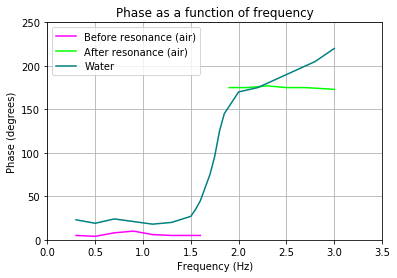

In [11]:
plt.plot(freq_air[0:9],phase_air[0:9], label = "Before resonance (air)",
        color = "magenta")
plt.plot(freq_air[10:],phase_air[10:], label = "After resonance (air)",
        color = "lime")
plt.plot(freq_water,phase_water, label = "Water", color = "teal")
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (degrees)")
plt.title("Phase as a function of frequency")
#ensuring the necessary ranges are plotted
plt.xlim(0,3.5)
plt.ylim(0,250)
plt.grid()

It should be noted that the Phase as a function of frequency does not have a line connecting the two measured phases. Since the apparatus become too unstable near resonance for this case, measurements were unable to be taken. By analyzing the sudden spike in the phase, it can be assumed that the line connecting the two slopes is approximately infinite, i.e. there is a verticle line connecting the two phase slopes. 

## Estimating the resonance frequencies 

In [14]:
print(max(amp_water))
#the value was found directly out of the water ampltiude
#list, and its index was noted
print("The frequency of the water-damped resonance is", \
     freq_water[10], "Hz")

33.0
The frequency of the water-damped resonance is 1.7 Hz


In [16]:
#values in between 1.65 and 1.90 Hz could not
#have ampltiudes taken, therefore the resonance frequnecy 
#was the mid-point of the range found
air_res = (1.65 + 1.90) / 2
print("The frequency of the air-damped resonance is", \
     round(air_res,2), "Hz")

The frequency of the air-damped resonance is 1.77 Hz


## Damping coefficient calculations

In [69]:
#creating an arbitrary time span
period1 = np.linspace(1,len(amp_air),len(amp_air)) #in s
period2 = np.linspace(1,len(amp_water),len(amp_water)) #in s
#making each step in the array a scalar multiple of the
#period measured
period_air = period1 * 10 * 0.56 #period of oscillation for air
period_water = period2 * 0.58 #in s
M = 51.6 #in g

In [70]:
#applying equation (8)
def damp(x1,x2,T,M):
    b = (2 * M / T) * np.log(x1 / x2)
    return b

In [71]:
#creating lists
b_water = []
b_air = []

In [72]:
for i in range(len(amp_air) - 2):
    const = damp(amp_air[i],amp_air[i+1],
                 period_air[i+1] - period_air[i],M)
    b_air.append(const)
for j in range(len(amp_water) - 2):
    const = damp(amp_water[j],amp_water[j+1],
                 period_water[j+1] - period_water[j],M)
    b_water.append(const)

In [73]:
print("The damping coefficient for air is (",round(np.mean(b_air),3), \
        "+/-", round(np.std(b_air)/np.sqrt(len(b_air)),2), ") g/s.")

The damping coefficient for air is ( 0.672 +/- 2.03 ) g/s.


In [74]:
print("The damping coefficient for water is (",round(np.mean(b_water),3), \
        "+/-", round(np.std(b_water)/np.sqrt(len(b_water)),2), ") g/s.")

The damping coefficient for water is ( 5.05 +/- 12.86 ) g/s.
